## Dependencias

In [1]:
import seaborn
import pandas
import geopandas
from pysal.lib import weights
import numpy
import matplotlib.pyplot as plt

## Data

In [2]:
medellin = geopandas.read_file("data/limite_barrio_vereda_cata.geojson")

In [3]:
medellin.head()

,OBJECTID,comuna,barrio,codigo,nombre_barrio,indicador_ur,sector,nombre_comuna,fecha_sincronizacion,Shape_Length,Shape_Area,geometry
0,1,50,87,5087,Suburbano Potrera Miserenga,R,7,PALMITAS,1714529701000,10793.745904,1.112742e+06,"POLYGON ((4702200.304 2261423.185, 4702194.246..."
1,2,90,08,9008,Piedras Blancas,R,9,SANTA ELENA,1714529701000,28242.883995,1.173412e+07,"POLYGON ((4719822.945 2254827.749, 4719821.769..."
2,3,08,06,0806,Llanaditas,U,3,VILLA HERMOSA,1714529701000,3770.603451,2.638531e+05,"POLYGON ((4719157.189 2250063.198, 4719157.181..."
3,4,60,06,6006,La Cuchilla,R,7,SAN CRISTOBAL,1714529701000,5659.422464,6.306618e+05,"POLYGON ((4705777.892 2254965.265, 4705777.499..."
4,5,14,11,1411,Los Balsos No.1,U,5,EL POBLADO,1714529701000,6185.278317,1.426434e+06,"POLYGON ((4717311.158 2242869.355, 4717311.146..."


In [4]:
medellin.describe()

,OBJECTID,sector,fecha_sincronizacion,Shape_Length,Shape_Area
count,349.000000,349.000000,3.490000e+02,349.000000,3.490000e+02
mean,175.000000,4.220630,1.714530e+12,4888.895067,1.079700e+06
std,100.891856,2.509758,0.000000e+00,5350.967479,2.488714e+06
min,1.000000,1.000000,1.714530e+12,257.367765,2.754026e+03
25%,88.000000,2.000000,1.714530e+12,2512.350155,2.347123e+05
50%,175.000000,4.000000,1.714530e+12,3220.970268,3.711839e+05
75%,262.000000,6.000000,1.714530e+12,4375.363056,6.204005e+05
max,349.000000,9.000000,1.714530e+12,38723.006984,1.710786e+07


## Pesos de contigüidad

### Contigüidad de torre

In [5]:
wr = weights.contiguity.Rook.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_85017/1801246121.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Rook.from_dataframe(medellin)
/Users/ortega/Documents/software/clases/Geographic_Data_Science_with_Python/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 107.
  W.__init__(self, neighbors, ids=ids, **kw)


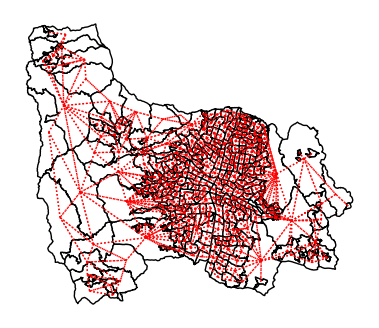

In [6]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
wr.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

<Axes: ylabel='Frequency'>

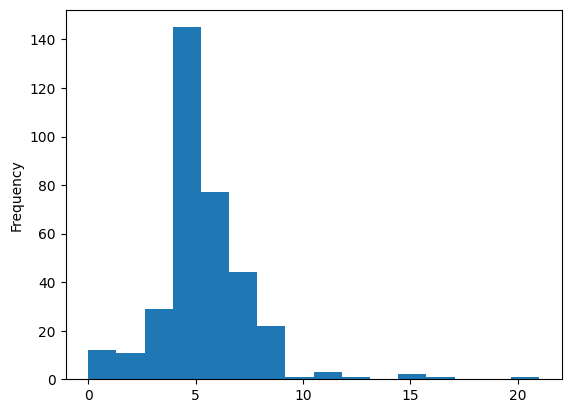

In [7]:
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0])

In [8]:
s[s > 15]

1      21
146    16
dtype: int64

### Contigüidad de reina

In [9]:
w_queen = weights.contiguity.Queen.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_85017/3199273579.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(medellin)
/Users/ortega/Documents/software/clases/Geographic_Data_Science_with_Python/.venv/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 107.
  W.__init__(self, neighbors, ids=ids, **kw)


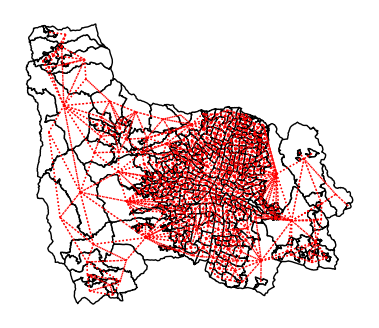

In [10]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
w_queen.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [11]:
print(w_queen.n)
print(w_queen.pct_nonzero) # Porcentaje de elementos distintos de cero

349
1.6173923038398699


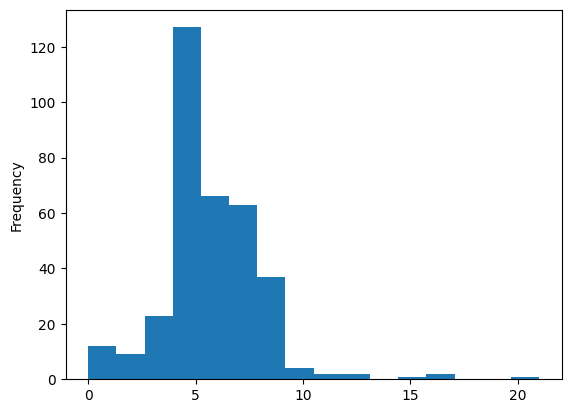

In [12]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [13]:
s[s > 15]

1      21
146    16
163    16
dtype: int64

In [14]:
medellin.iloc[163]

OBJECTID                                                              164
comuna                                                                 90
barrio                                                                 05
codigo                                                               9005
nombre_barrio                                                  Media Luna
indicador_ur                                                            R
sector                                                                  9
nombre_comuna                                                 SANTA ELENA
fecha_sincronizacion                                        1714529701000
Shape_Length                                                 21041.959806
Shape_Area                                                 11118541.80888
geometry                POLYGON ((4722012.3610000005 2249387.139500001...
Name: 163, dtype: object

## Pesos basados en distancia